In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

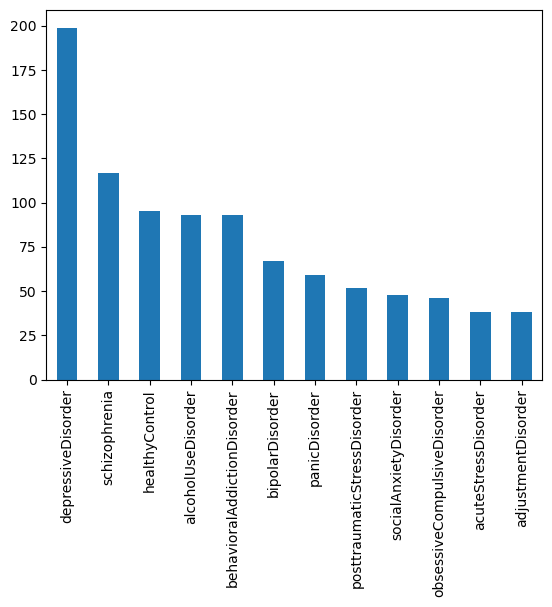

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

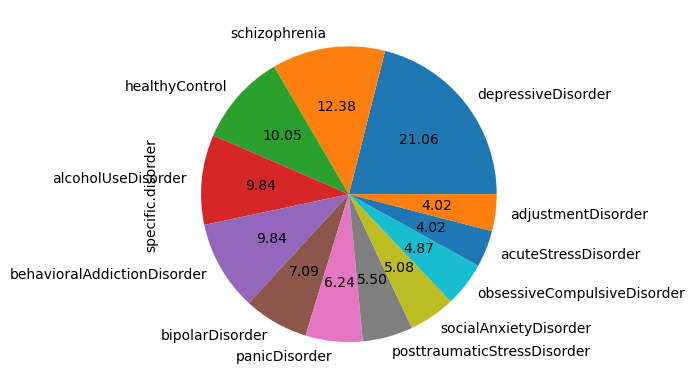

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [13]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [14]:
from sklearn import linear_model

# Creating logistic regression model object to be trained later.
# Issue converging with max number of iterations with link to - https://scikit-learn.org/stable/modules/preprocessing.html
model = linear_model.LogisticRegression( max_iter=10000)

In [15]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [16]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.19718309859154928

In [17]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([11,  6,  5,  9,  2,  4,  5,  4,  6,  9, 11,  5, 11,  3,  6,  6,  9,
        6,  3,  7, 11, 12, 11,  6,  3,  6,  4,  2,  3,  8,  3,  6, 11,  6,
        4, 11, 10,  4,  6, 12,  6,  4,  8,  4,  4, 11,  7,  6,  6,  4,  6,
        6,  6, 11, 12, 11, 11,  7,  6,  7, 12, 11, 12,  6, 11,  6,  4,  1,
        5,  4, 11,  6, 10, 11,  3,  8,  8,  5,  9,  8,  6,  2,  6,  9,  8,
        6, 11,  6,  4,  6,  4,  7,  6,  2, 11,  6,  6,  6,  7, 10,  3,  7,
        8, 12, 11,  6,  9,  6,  6,  3, 11,  3,  5,  5,  3,  3, 10, 10,  6,
        6,  7, 12, 11,  2,  3,  8,  6,  4,  4,  6, 10,  5,  1,  4,  8,  6,
        3,  4,  9,  3,  9,  6,  6,  3,  9, 11,  3, 11,  6,  7,  5, 11,  7,
       11,  6,  5,  4,  5,  6, 11, 12,  3,  4,  4, 11,  6,  3,  5,  7,  1,
        4, 10,  8, 11,  9,  6,  3,  6,  6,  5,  5, 10,  9,  6,  6,  7, 11,
        7,  2, 11,  1,  9, 11,  3,  6,  2,  4,  6,  4,  3,  3,  8,  7, 11,
        6,  6, 10,  3,  1,  9, 11, 11, 12, 11,  5,  6,  3,  4,  6, 11,  2,
       11,  7, 10,  4,  5

In [18]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  0,  3,  1,  3,  0,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  3,  3,  0,  0,  1,  4,  0],
       [ 0,  2,  4,  2,  0,  4,  2,  3,  3,  1,  3,  1],
       [ 1,  1,  2,  4,  2,  9,  0,  1,  1,  1,  3,  1],
       [ 3,  0,  6,  4,  4,  8,  0,  1,  0,  1,  1,  0],
       [ 1,  5,  5,  4,  5, 25,  6,  3,  0,  0,  6,  1],
       [ 0,  2,  4,  1,  2,  9,  4,  2,  1,  1,  5,  0],
       [ 0,  1,  0,  0,  0,  1,  2,  0,  1,  1,  6,  0],
       [ 0,  1,  1,  3,  1,  1,  1,  3,  3,  1,  3,  1],
       [ 0,  0,  1,  1,  1,  0,  0,  0,  3,  1,  4,  0],
       [ 0,  1,  5,  1,  3,  8,  1,  2,  2,  3,  6,  2],
       [ 0,  0,  1,  3,  1,  3,  0,  0,  1,  0,  0,  5]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

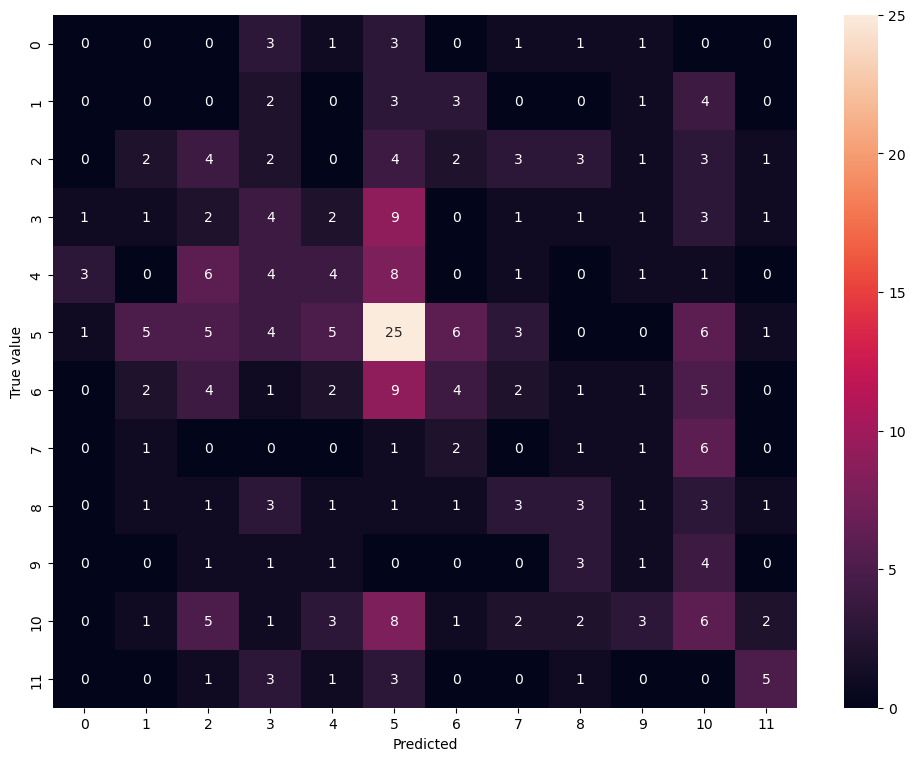

In [19]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,6) with 9 incorrect classifications represents how bipolar and depressive orders were mis classes often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [ ]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

In [20]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.Explainer(model.predict_proba, X_train)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
Permutation explainer: 285it [1:26:18, 18.23s/it]                                                                      


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


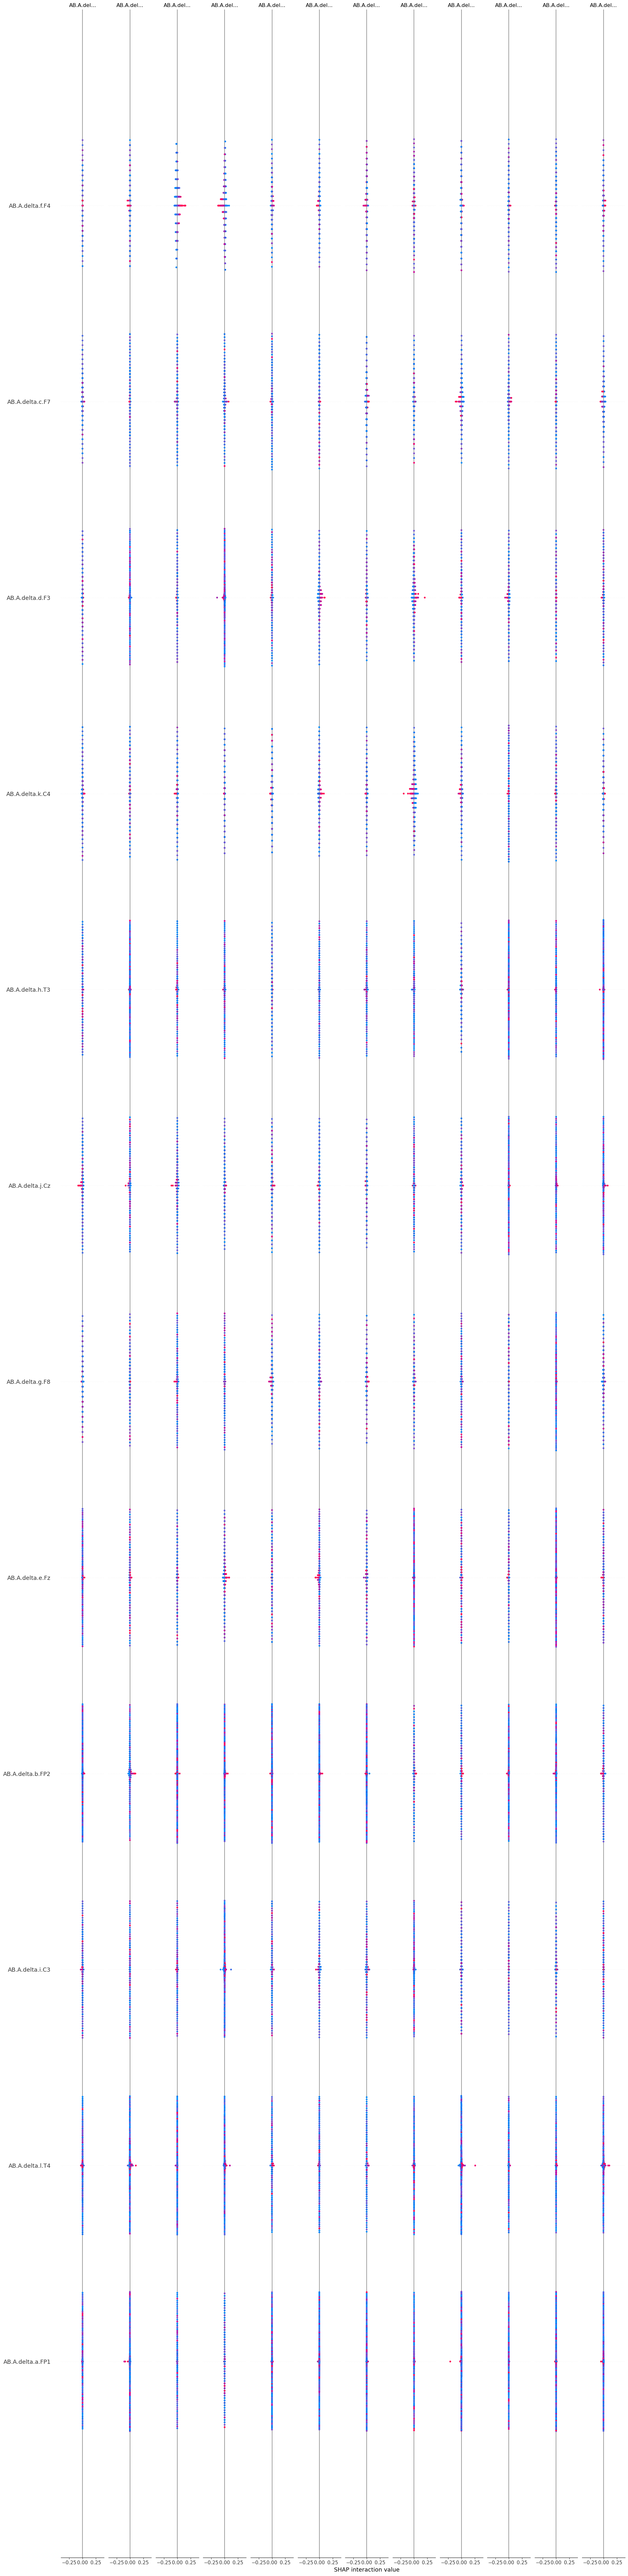

In [21]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [23]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
5,AB.A.delta.f.F4,7.363998
10,AB.A.delta.k.C4,4.677423
2,AB.A.delta.c.F7,4.313288
3,AB.A.delta.d.F3,3.459626
6,AB.A.delta.g.F8,2.820756
9,AB.A.delta.j.Cz,2.739895
4,AB.A.delta.e.Fz,2.470513
7,AB.A.delta.h.T3,2.002534
8,AB.A.delta.i.C3,1.923735
1,AB.A.delta.b.FP2,1.440225


In [24]:
# Below I am retrieving the 10 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['AB.A.delta.f.F4',
 'AB.A.delta.k.C4',
 'AB.A.delta.c.F7',
 'AB.A.delta.d.F3',
 'AB.A.delta.g.F8',
 'AB.A.delta.j.Cz',
 'AB.A.delta.e.Fz',
 'AB.A.delta.h.T3',
 'AB.A.delta.i.C3',
 'AB.A.delta.b.FP2']

In [25]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,AB.A.delta.f.F4,AB.A.delta.k.C4,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.g.F8,AB.A.delta.j.Cz,AB.A.delta.e.Fz,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.b.FP2
0,26.064096,18.726275,25.293659,25.431386,26.962306,22.084626,27.157943,16.140803,17.928469,29.558049
1,17.885986,18.357331,26.757280,17.888937,19.711728,23.460594,18.073537,8.810296,16.205385,34.845856
2,19.733524,16.179073,16.108600,18.438291,11.736709,24.324106,27.098033,11.327534,17.173299,15.155292
3,42.758987,36.838081,34.103989,36.462923,38.002407,36.887265,37.904649,26.303330,32.681753,39.136562
4,10.495163,9.996240,10.481318,16.898775,10.468839,12.156164,11.355207,9.622323,10.772125,9.073504
...,...,...,...,...,...,...,...,...,...,...
940,12.451371,9.207757,16.676674,16.432607,12.126499,10.795470,12.560949,10.044354,9.446693,16.912154
941,19.366903,15.965212,21.406082,22.840180,25.692413,18.112403,18.802283,10.097856,14.600330,23.018120
942,16.940304,15.167706,20.696263,17.510941,15.605748,16.372727,19.099672,9.916546,15.404386,18.035856
943,10.523212,8.778966,12.079624,19.150356,8.997941,9.517701,11.189703,5.713006,9.971759,16.528605


In [26]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [27]:
from sklearn import linear_model

# Creating logistic regression model object to be trained later.
# Issue converging with max number of iterations with link to - https://scikit-learn.org/stable/modules/preprocessing.html
model = linear_model.LogisticRegression( max_iter=10000)

In [28]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [29]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.2112676056338028

In [30]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([ 6,  6,  6,  6,  6, 10,  6,  6,  6,  6,  6,  6,  9,  6,  6,  6,  6,
        2,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 12,  6,
        6,  4,  4,  6,  7,  6,  6,  4,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  9,  6,  6,  6,  4,  6,  6,  6,  6,  2,  6,  6,  6,  6,  6,
        6, 10,  6,  6,  6,  4,  6, 11,  4,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  4,  6,  6, 11,  6,  6,  6,  7,  6,  6,  6,  6,  6,  6,  6,  4,
       11,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 11,  6,  7,  6,  4,  6,
        6,  6,  6, 11, 11,  6,  6,  6,  6, 11,  6,  6, 12, 11,  7,  6,  6,
        6,  6,  6,  6,  4,  6,  6,  6,  6,  6,  6,  6,  7,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  6,  4,  7,  6,  4,  6,  4,  4,  7,  6,  6,  6,
        7,  6,  6,  6,  6,  6,  4,  4,  6,  7,  6,  6,  6,  6,  7,  6,  6,
        7,  6, 12,  6,  6,  6,  6,  1,  6,  4,  6,  6,  9,  6, 12,  6,  6,
        6,  2,  6,  6,  6,  6,  6,  6,  7,  6,  6,  6, 10,  4,  6,  6, 11,
        6,  6,  6,  6,  6

In [31]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  0,  2,  0,  6,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  3,  0,  8,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0, 20,  2,  0,  0,  1,  0,  1],
       [ 0,  1,  0,  7,  0, 14,  2,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 21,  3,  0,  0,  0,  2,  1],
       [ 1,  0,  0,  1,  0, 50,  6,  0,  1,  0,  2,  0],
       [ 0,  2,  0,  1,  0, 25,  2,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  3,  0,  7,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  2,  0, 14,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  1,  0,  8,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 29,  1,  0,  2,  0,  1,  1],
       [ 0,  1,  0,  1,  0, 10,  1,  0,  0,  0,  1,  0]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

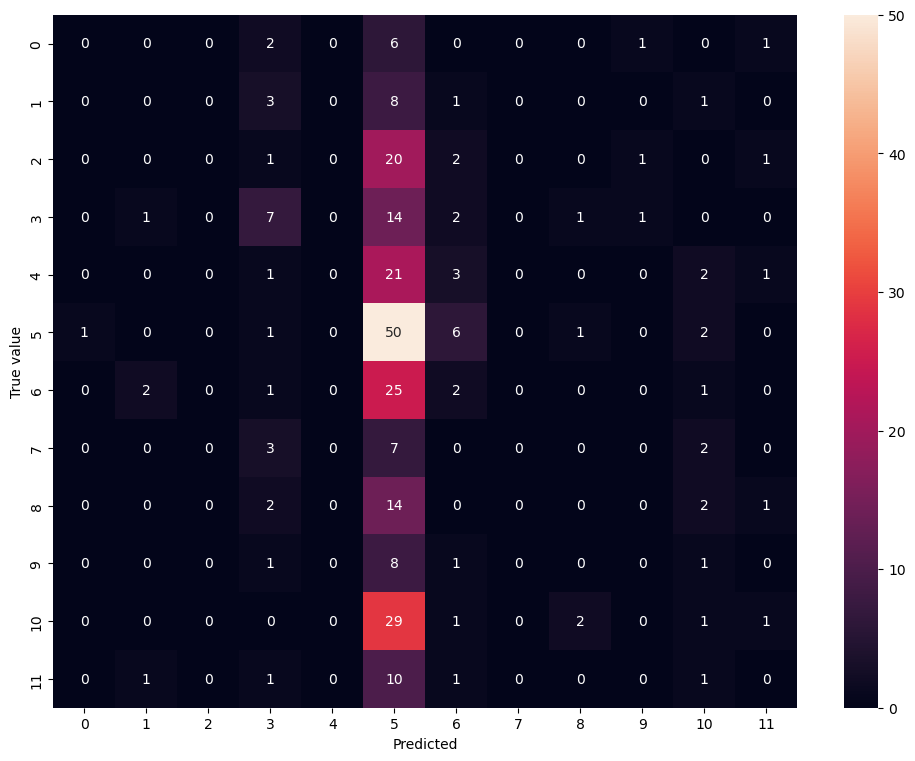

In [32]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,10) with 29 incorrect classifications represents how bipolar and depressive orders were mis classes often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [ ]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

In [33]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html